
Stroke is a leading cause of death and disability worldwide, primarily attributed to atherothromboembolism and cardiogenic embolism. The main risk factors for atherothromboembolicischemic stroke include high blood pressure, cholesterol, smoking, and diabetes, while atrial fibrillation and ischemic heart disease are the main risk factors for cardiogenic ischemic stroke. Stroke prevention strategies involve both a 'population' approach targeting community risk factors through public education and legislation and a 'high risk' approach focusing on identifying at-risk individuals and providing optimal medical therapies, including controlling risk factors and administering antithrombotic therapies (Hankey, G. J.,2005).

Approximately 75% of strokes are first-time occurrences, indicating that focusing on preventing initial strokes can have a greater impact on reducing the overall burden of stroke compared to preventing recurrent strokes. To prevent first-ever atherothromboembolic ischemic strokes, it is essential to control vascular risk factors such as blood pressure and cholesterol levels. Lowering blood pressure by about 10-12 mmHg systolic and 5-6 mmHg diastolic can reduce the relative risk of stroke by approximately 38%. Similarly, reducing total cholesterol concentration with statins by one-fifth decreases the relative risk of stroke, myocardial infarction, and death due to vascular causes by about 25%. Additionally, certain lifestyle changes like quitting smoking, controlling blood glucose, and maintaining a healthy diet and exercise routine can contribute to reducing the risk of stroke.

References:
Hankey, G. J. (2005). Preventable stroke and stroke prevention. Journal of Thrombosis and Haemostasis, 3(8), 1638-1645.


A stroke happens when blood stops flowing to any part of your brain, damaging brain cells. The effects of a stroke depend on the part of the brain that was damaged and the amount of damage done. Knowing how your brain works can help you understand your stroke.

References:
https://www.heartandstroke.ca/stroke/what-is-stroke


In [1]:
# Importing warnings library and ignoring any warning messages
import warnings
warnings.filterwarnings('ignore')

# Importing basic libraries for data manipulation and analysis
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

# Importing visualization modules for data exploration
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install pywaffle
from pywaffle import Waffle

# Enabling inline plotting for Jupyter Notebook and initializing plotly
%matplotlib inline
init_notebook_mode(connected=True)

# Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             auc,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)

# Dimensionality reduction techniques
from sklearn.decomposition import PCA

import pylab as pl

# Handling imbalanced datasets using different sampling techniques
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)
from imblearn.over_sampling import (SMOTE,
                                    ADASYN)

# Importing different machine learning algorithms for classification
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 8.0 MB/s eta 0:00:00


In [2]:
# Importing the necessary module "drive" from the package "google.colab"
from google.colab import drive

# Mounting the Google Drive in the Colab environment
# The "/drive" directory will be used as the mount point for the Google Drive
# The "force_remount=True" argument ensures that the drive will be remounted even if it was previously mounted
drive.mount("/drive", force_remount=True)

Mounted at /drive


In [5]:
data = pd.read_csv('/drive/My Drive/JOB/JINGLIN Projects/Healthcare/Stroke_Prediction/healthcare-dataset-stroke-data.csv')

In [6]:
# top 5 lines of dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.shape

(5110, 12)

In [9]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
# stats of numerical data
round (data.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


the code is creating a heatmap to visualize the missing values in the data DataFrame. Missing values are usually represented by blank spaces in the heatmap, and non-missing values will be displayed using colors according to the specified color map ('magma' in this case). Since cbar is set to False, no color bar will be displayed to indicate the color scale.

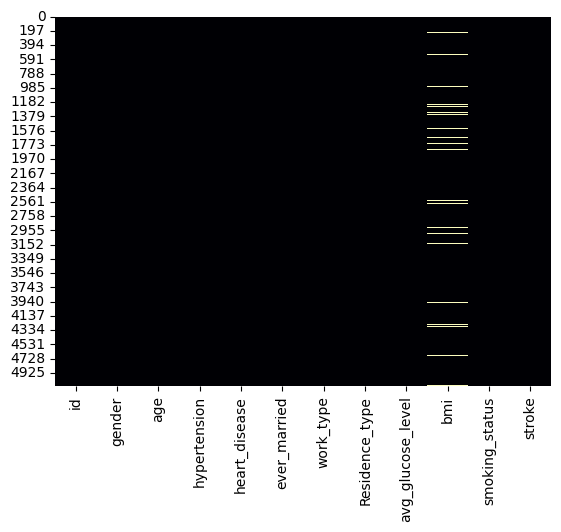

In [11]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

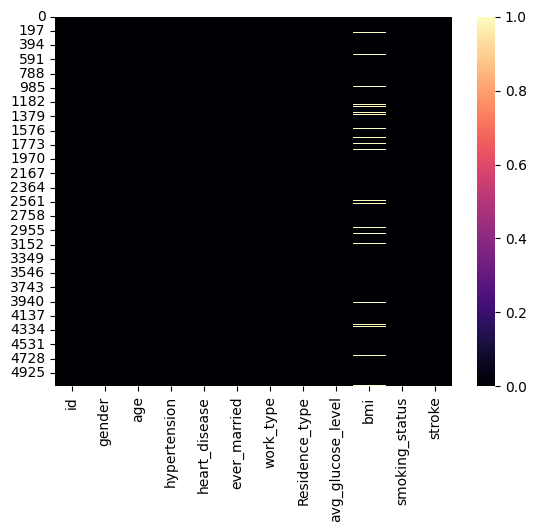

In [12]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = True);

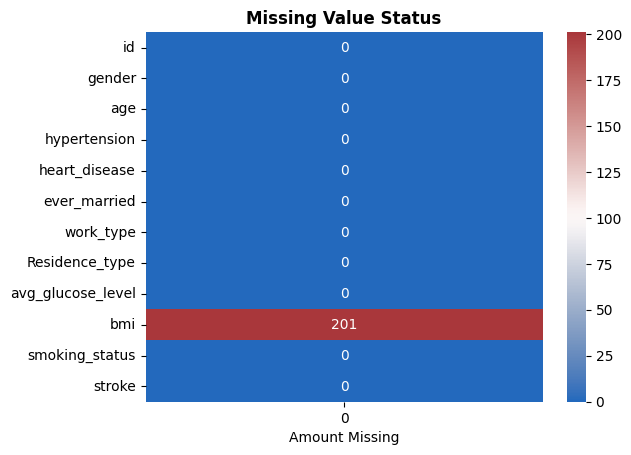

In [13]:
# showing null data better
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

 call data.describe(), it will return a new DataFrame containing the following statistics for each numerical column in the original data DataFrame:

count: The number of non-null values in each column.
mean: The arithmetic mean (average) of the values in each column.
std: The standard deviation, which measures the dispersion or spread of values around the mean.
min: The minimum value in each column.
25%: The 25th percentile value, also known as the first quartile or lower quartile.
50%: The 50th percentile value, also known as the median or second quartile.
75%: The 75th percentile value, also known as the third quartile or upper quartile.
max: The maximum value in each column.

Please note that describe() will only consider numerical columns, and any non-numeric columns will be excluded from the output. If you have mixed data types in your DataFrame and want to include non-numeric columns in the summary, you can use include='all' as a parameter: data.describe(include='all').

In [14]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [15]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
# stats of categorical data
round (data.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [17]:
# stats of numerical data
round (data.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [18]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(17,13))
sns.set_context('paper',font_scale=2)

def set_seed(seed=31415):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

A few null values are present in the bmi feature!

In [ ]:
# Handeling missing values Method 1

The dataset had 201 samples with absent BMI value; rather than imputing it naively with the mean or the median, we used a simple decision tree model which based on the age and gender of all other samples gave us a fair prediction for the missing values.

In [20]:
# Step 1: Create a pipeline for predicting missing BMI values using a decision tree regression model
DT_bmi_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),                 # Step 2: Scale the data to have zero mean and unit variance
    ('lr', DecisionTreeRegressor(random_state=42))  # Step 3: Use a decision tree regressor for prediction
])

# Step 4: Create a new DataFrame `X` containing 'age', 'gender', and 'bmi' columns from the original `data` DataFrame
X = data[['age', 'gender', 'bmi']].copy()

# Step 5: Replace categorical values in the 'gender' column with numerical values for modeling, and convert to uint8 data type
X.gender = X.gender.replace({'Male': 0, 'Female': 1, 'Other': -1}).astype(np.uint8)

# Step 6: Create a new DataFrame `Missing` containing only the rows where the 'bmi' column has missing values (NaNs)
Missing = X[X.bmi.isna()]

# Step 7: Update `X` DataFrame to exclude rows with missing 'bmi' values
X = X[~X.bmi.isna()]

# Step 8: Create a new Series `Y` containing the 'bmi' values that were removed from the `X` DataFrame
Y = X.pop('bmi')

# Step 9: Fit the pipeline to the training data (`X` and `Y`) to train the decision tree regressor
DT_bmi_pipe.fit(X, Y)

# Step 10: Predict the missing BMI values for the samples with missing 'bmi' values (`Missing`)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age', 'gender']]), index=Missing.index)

# Step 11: Update the original `data` DataFrame with the predicted BMI values
data.loc[Missing.index, 'bmi'] = predicted_bmi

In [21]:
print('Missing values: ',sum(data.isnull().sum()))

Missing values:  0


In [22]:
# 150 dots/pixels for every inch

Can age influence the likelihood of experiencing a stroke? How does gender factor into this, along with BMI? All of these inquiries can be investigated and addressed through the use of data visualization techniques.

In [23]:
variables = [variable for variable in data.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

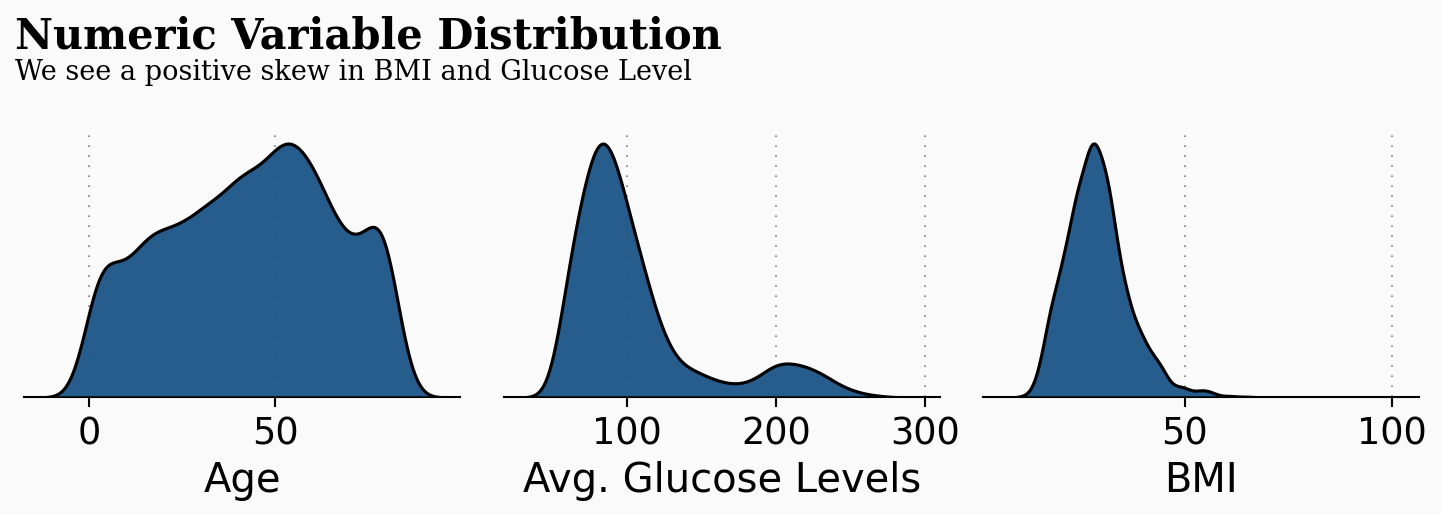

In [24]:
# reference: https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(data[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

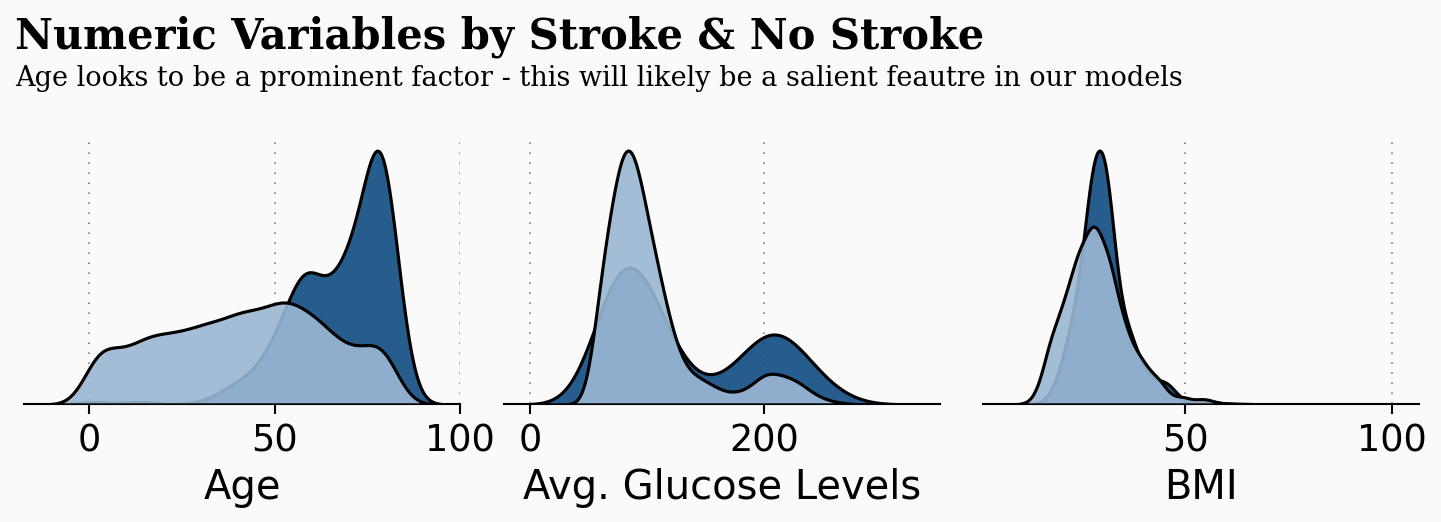

In [25]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = data[data['stroke'] == 1]
ns = data[data['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')

ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models',
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

In [26]:
# we can learn some visuls echnique from https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes/notebook
# the conclusion need to be made carefully
# based on the presented plots, it appears evident that age significantly influences stroke risk, with higher age correlating to increased risk of stroke.

In [27]:
# Selecting rows from DataFrame `df` where the 'stroke' column is equal to 1 (indicating stroke patients)
str_only = data[data['stroke'] == 1]

# Selecting rows from DataFrame `df` where the 'stroke' column is equal to 0 (indicating non-stroke patients)
no_str_only = data[data['stroke'] == 0]

In [31]:
no_str_only['avg_glucose_level']

249      95.12
250      87.96
251     110.89
252      69.04
253     161.28
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 4861, dtype: float64

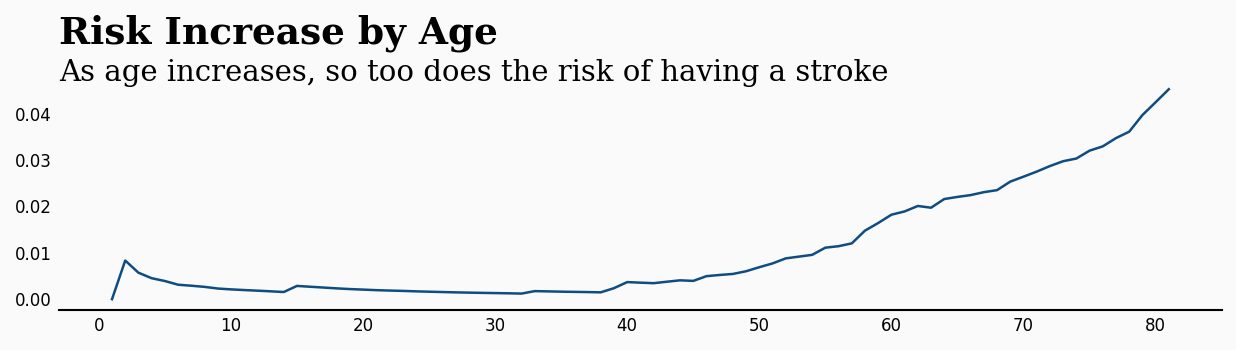

In [34]:
# Setting up the figure with specified size, resolution, and background color
fig = plt.figure(figsize=(10, 5), dpi=150, facecolor=background_color)

# Create a 2x1 grid of subplots using GridSpec
gs = fig.add_gridspec(2, 1)

# Adjust the spacing between subplots
gs.update(wspace=0.11, hspace=0.5)

# Create the first subplot (top position) in the grid
ax0 = fig.add_subplot(gs[0, 0])

# Set the face color of the first subplot
ax0.set_facecolor(background_color)

# Convert the 'age' column in the DataFrame 'data' to integers
data['age'] = data['age'].astype(int)

# Initialize an empty list to store stroke rate by age
rate = []

# Calculate the stroke rate for each age and add it to the 'rate' list
for i in range(data['age'].min(), data['age'].max()):
    rate.append(data[data['age'] < i]['stroke'].sum() / len(data[data['age'] < i]['stroke']))

# Create a line plot of stroke rate over age, using the 'rate' list as data and specifying the color and subplot
sns.lineplot(data=rate, color='#0f4c81', ax=ax0)

# Hide the top, right, and left spines (border lines) of the plot
for s in ["top", "right", "left"]:
    ax0.spines[s].set_visible(False)

# Set the tick label font size for both x and y axes to 8
ax0.tick_params(axis='both', which='major', labelsize=8)

# Remove the tick marks from both x and y axes
ax0.tick_params(axis=u'both', which=u'both', length=0)

# Add text annotations to the plot
ax0.text(-3, 0.055, 'Risk Increase by Age', fontsize=18, fontfamily='serif', fontweight='bold')
ax0.text(-3, 0.047, 'As age increases, so too does the risk of having a stroke', fontsize=14, fontfamily='serif')

# Display the plot
plt.show()

As age increases, the risk of stroke also rises.

However, the low values on the y-axis indicate that the dataset is highly imbalanced.

The dataset contains only 249 stroke cases out of a total of 5000, which is approximately 1 in 20 cases.

In [ ]:
# Modelling
# age is an important varible in predicion
# SMOTE (Synthetic Minority Over-sampling Technique) to balance our dataset
#

In [35]:
# Encoding categorical values

data['gender'] = data['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
data['Residence_type'] = data['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
data['work_type'] = data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [ ]:
# The baseline of the model

In [36]:
X  = data[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = data['stroke']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [37]:
X_test.head(2)

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi
4688,0,31,0,0,1,64.85,23.0
4478,0,40,0,0,1,65.29,28.3


In [38]:
# Our data is biased, we can fix this with SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [39]:
# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])

model Random Forest, SVM, and Logisitc Regression for this classificatioin task.

In [40]:
rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [41]:
rf_cv = cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')

In [42]:
print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9345628355779677
SVM mean : 0.874405860432315
Logistic Regression mean : 0.8251937617660563


In [ ]:
#Random Forest performed the best

In [43]:
# try random foresst in unseen datasets
rf_pipeline.fit(X_train_resh,y_train_resh)
svm_pipeline.fit(X_train_resh,y_train_resh)
logreg_pipeline.fit(X_train_resh,y_train_resh)


rf_pred   =rf_pipeline.predict(X_test)
svm_pred  = svm_pipeline.predict(X_test)
logreg_pred   = logreg_pipeline.predict(X_test)

rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)

In [44]:
print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)

Mean f1 scores:
RF mean : 0.1556420233463035
SVM mean : 0.15416238437821175
LR mean : 0.1924144310823312


In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

print(classification_report(y_test,rf_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      3404
           1       0.12      0.23      0.16       173

    accuracy                           0.88      3577
   macro avg       0.54      0.57      0.55      3577
weighted avg       0.92      0.88      0.90      3577

Accuracy Score:  0.8786692759295499
